In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import pylab
import imageio
import glob
import skimage

In [69]:
img = cv2.imread('ex1.jpg',0)

In [70]:
def rrr_uzv_col_reordered(a,sim=False,r=None,V=None):
    
    m,n = a.shape[0],a.shape[1]
    
    if(sim and r is not None):
        l = 2*r
    else:
        l = int(np.ceil(np.square(np.linalg.norm(a,ord='nuc')/np.linalg.norm(a,ord='fro'))))
        
    if(V is not None):
        z2 = V
    else:
        z2 = np.random.randn(n,l)
    
    q=4
    
    for i in range(q):
        z1 = np.matmul(a,z2)
        z2 = np.matmul(np.transpose(a),z1)
        
        u, r1 = np.linalg.qr(z1)
        v, r2 = np.linalg.qr(z2)
        z2 = v
    
    a_av = np.matmul(a,v)
    permute_index = np.argsort(np.linalg.norm(a_av,axis=0))[::-1]
    us = u[:,permute_index]
    vs = v[:,permute_index]
    zs = np.matmul(np.matmul(us.T,a),vs)
    a_s = np.matmul(np.matmul(us,zs),vs.T)
    rmse2  = np.sqrt(np.sum(np.square(a-a_s))/(m*n))
    
    return a_s,rmse2,us,zs,vs

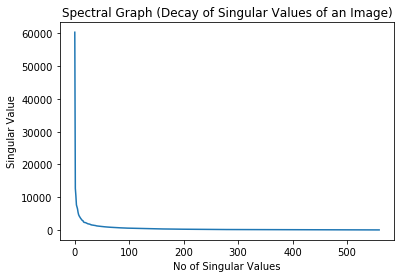

In [71]:
plt.plot(np.linalg.svd(img)[1])
plt.ylabel("Singular Value")
plt.xlabel("No of Singular Values")
plt.title("Spectral Graph (Decay of Singular Values of an Image)")
plt.show()

In [72]:
u,z,v = np.linalg.svd(img)

In [113]:
a_s,err,u1,z1,v1 = rrr_uzv_col_reordered(img)

In [114]:
err

14.183249038553818

In [115]:
z1.shape

(21, 21)

In [116]:
z_rrr = np.zeros(z.shape)

In [117]:
for i in range(z1.shape[0]):
    z_rrr[i] = z1[i][i]

In [119]:
z_rrr.shape

(560,)

In [120]:
z.shape

(560,)

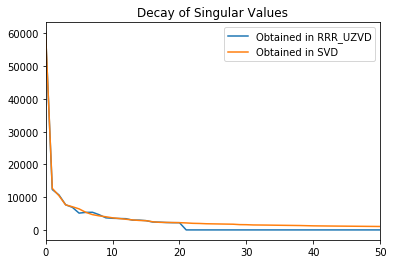

In [123]:
plt.plot(abs(z_rrr),label = "Obtained in RRR_UZVD")
plt.plot(z,label="Obtained in SVD")
plt.title("Decay of Singular Values")
plt.xlim(0,50)
plt.legend()
plt.show()

In [107]:
plt.show()

In [13]:
k = 50

In [14]:
u.shape

(560, 560)

In [15]:
v.shape

(1000, 1000)

In [16]:
z.shape

(560,)

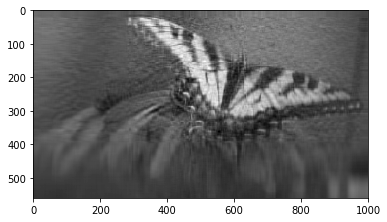

In [17]:
Ar = np.zeros((len(u), len(v)))
for i in range(25):
    Ar += z[i] * np.outer(u.T[i], v[i])

plt.imshow(Ar,cmap='gray')
plt.show()

In [18]:
Ar.shape

(560, 1000)

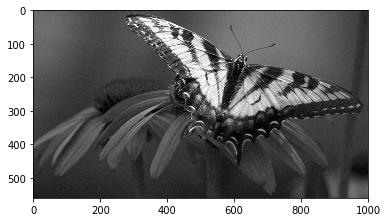

In [19]:
plt.imshow(img,cmap='gray')
plt.show()

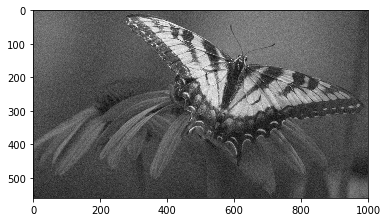

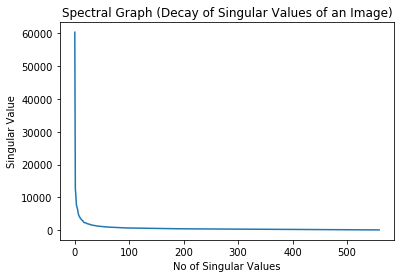

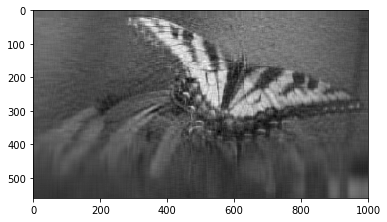

In [20]:
img = cv2.imread('ex1.jpg',0)
img = img + 10*np.random.randn(*img.shape)
u,z,v = np.linalg.svd(img)

plt.imshow(img,cmap='gray')
plt.show()

plt.plot(z)
plt.ylabel("Singular Value")
plt.xlabel("No of Singular Values")
plt.title("Spectral Graph (Decay of Singular Values of an Image)")
plt.show()

Ar = np.zeros((len(u), len(v)))
for i in range(25):
    Ar += z[i] * np.outer(u.T[i], v[i])

plt.imshow(Ar,cmap='gray')
plt.show()

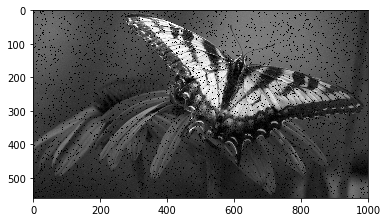

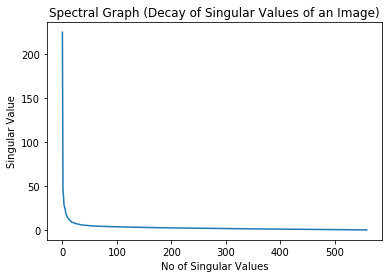

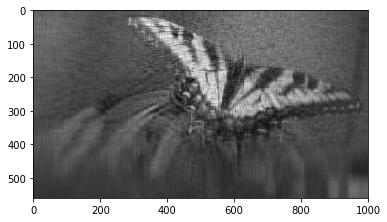

In [21]:
img = cv2.imread('ex1.jpg',0)
img = skimage.util.random_noise(img,mode='pepper')

u,z,v = np.linalg.svd(img)

plt.imshow(img,cmap='gray')
plt.show()

plt.plot(z)
plt.ylabel("Singular Value")
plt.xlabel("No of Singular Values")
plt.title("Spectral Graph (Decay of Singular Values of an Image)")
plt.show()

Ar = np.zeros((len(u), len(v)))
for i in range(25):
    Ar += z[i] * np.outer(u.T[i], v[i])

plt.imshow(Ar,cmap='gray')
plt.show()

In [22]:
def rrr_uzv_1(a,m,n,l):
    
    z2 = np.random.randn(n,l)
    z1 = np.matmul(a,z2)
    z2 = np.matmul(np.transpose(a),z1)
    u, r1 = np.linalg.qr(z1)
    v, r2 = np.linalg.qr(z2)
    z = np.matmul(np.matmul(u.T,a),v)
    a1 = np.matmul(np.matmul(u,z),v.T)
    rmse1 = np.sqrt(np.sum(np.square(a-a1))/(m*n))
    
    return a1,rmse1

In [23]:
m,n = 10,4

In [24]:
a = 100*np.random.randn(m, n)

In [25]:
num_rank = np.linalg.matrix_rank(a)

In [26]:
num_rank

4

In [27]:
l = int(np.ceil(np.square(np.linalg.norm(a,ord='nuc')/np.linalg.norm(a,ord='fro'))))

In [28]:
l

4

## Algorithm 1: 
### RRR-UZV Decomposition:

In [29]:
a_pred, rmse1 = rrr_uzv_1(a,m,n,l)

#### RMSE Loss:

In [30]:
rmse1

5.642556021934712e-14

## Algorithm 2 : 
### Using Column Reordering

In [31]:
a_pred_2, rmse2,u,z,v = rrr_uzv_col_reordered(a)

#### RMSE Loss:

In [32]:
rmse2

1.3552308264461522e-12

In [33]:
def rmse(a,b):
    m,n = a.shape[0],a.shape[1]
    return np.sqrt(np.sum(np.square(a-b))/(m*n))

In [34]:
def S_sigma(x,sigma):
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = np.sign(x[i][j])*max((np.abs(x[i][j])-sigma),0)
    
    return x

In [35]:
def D_sigma(U,Z,V,sigma):
    
    Z_temp = np.zeros(Z.shape)
    
    for i in range(Z.shape[0]):
        Z_temp[i][i] = np.sign(Z[i][i])*max((np.abs(Z[i][i])-sigma),0)
        
    return np.matmul(np.matmul(U,Z_temp),V.T)

In [36]:
def rpca_rrruzvd(X,sim=False,r=None):
    
    m,n = X.shape[0],X.shape[1]
    S = np.zeros((m,n))
#     L = np.random.randn(m,n)
    Y = np.zeros((m,n))
    
    tolerance = 1e-3
    eps2 = 1e-5
    u = min(m,n)*eps2
    lamda = 7
    rho = 1.9
    u_avg = 1e10
    converge = False
    V = None
    
    while not converge:
        
        (A,err,U,Z,V) = rrr_uzv_col_reordered((X-S+(Y/u)),sim=sim,r=r,V=V)
        
        L = D_sigma(U,Z,V,sigma=(1/u))
        S = np.array(S_sigma((X-L+(Y/u)),sigma=(lamda/u)))
        print(S.shape)
        Y = Y + u*(X-L-S)
        u = max(rho*u,u_avg)
        
        X_pred = L+S
        
        loss = rmse(X,X_pred)
        pred_ratio = np.linalg.norm((X-L-S),ord='fro')/np.linalg.norm((X),ord='fro')
        r = np.linalg.matrix_rank(L)
        print("Error: {}, Ratio: {}, Pred_rank: {}".format(err,pred_ratio,r))
        if(pred_ratio < tolerance):
            converge = True
            break
                    
    return L,S

### Showcasing Decay of Singular Values for Images

### Randomly Generated Data Recovery

In [37]:
m,n = 500,500

In [38]:
r_low = int(0.05*n)
s = int(0.05*n*n)

In [39]:
r_low

25

In [40]:
U = np.random.randn(n,r_low)
V = np.random.randn(n,r_low)
L = np.matmul(U,V.T)
S = np.zeros((n,n))
index1 = np.random.randint(0,high=n,size=s)
index2 = np.random.randint(0,high=n,size=s)
S[index1,index2] = np.random.randint(-100,high=100,size=s)

In [41]:
X = L+S

In [42]:
L1, S1 = rpca_rrruzvd(X,sim=True,r=r_low)

(500, 500)
Error: 10.92844101385272, Ratio: 0.8272726810280592, Pred_rank: 50
(500, 500)
Error: 10.827059125342334, Ratio: 5.0868148617868095e-11, Pred_rank: 50


## Real World Datasets Implementation : 
* #### Background Subtraction 

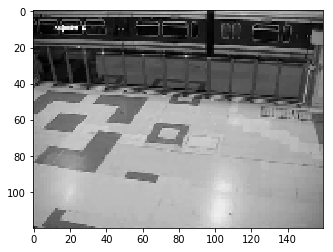

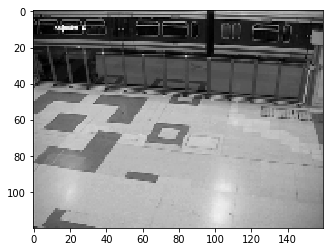

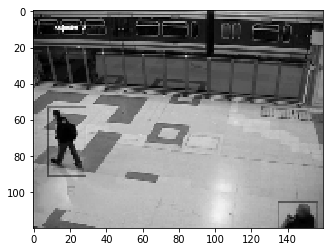

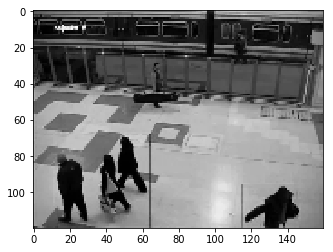

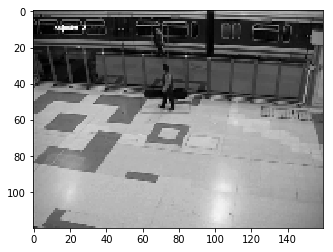

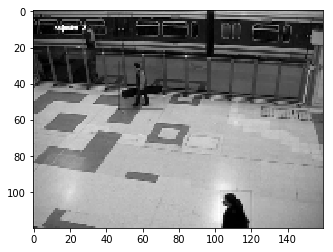

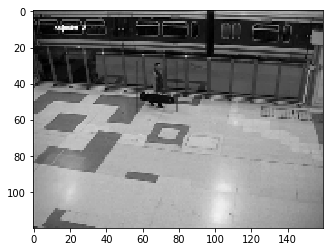

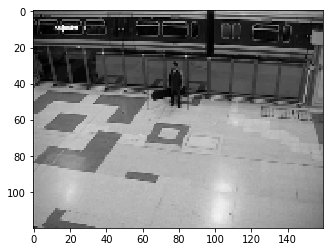

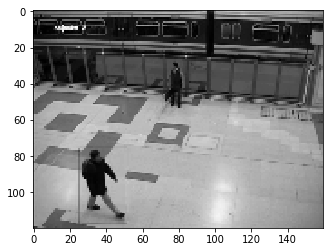

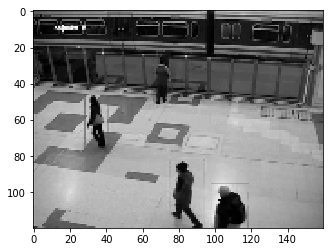

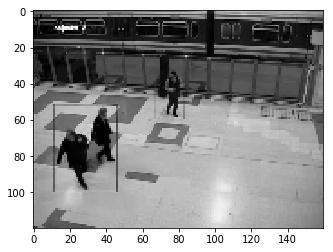

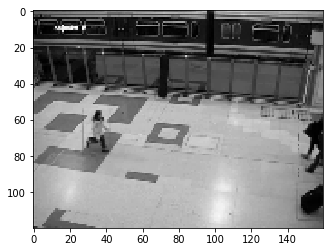

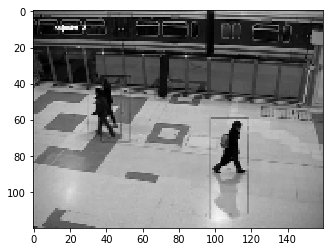

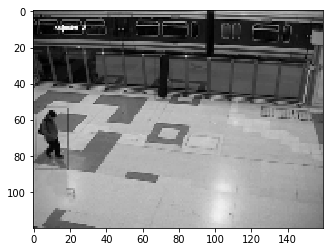

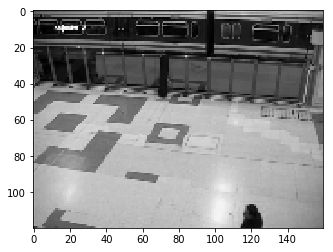

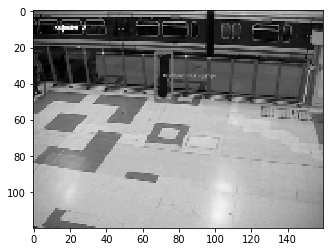

In [43]:
filename = 'sur1.webm'
vid = imageio.get_reader(filename,  'ffmpeg')
nums = vid.get_length()
is1 = True
for num in range(0,nums-100):
    frame = vid.get_data(num)
    
    if(num%100==0):
        frame = cv2.cvtColor(frame,cv2.COLOR_RGB2GRAY)
        frame = frame[::3,::3]
        image_shape = frame.shape
        frame1 = frame.flatten()
        if(is1):
            X = frame1
            is1 = False
        else:
            X = np.column_stack((X,frame1))
            if(X.shape[1]>200):
                break

        plt.imshow(frame,cmap='gray')
        plt.show()

In [44]:
vid.get_meta_data()

{'duration': 55.88,
 'ffmpeg_version': '4.0.2 built with gcc 4.8.2 (GCC) 20140120 (Red Hat 4.8.2-15)',
 'fps': 30.0,
 'nframes': 1676,
 'plugin': 'ffmpeg',
 'size': (480, 360),
 'source_size': (480, 360)}

In [45]:
X.shape

(19200, 16)

(19200, 16)
Error: 12.794525238763274, Ratio: 0.1636469837625431, Pred_rank: 1
(19200, 16)
Error: 12.696135654057569, Ratio: 5.5136840880747e-12, Pred_rank: 3


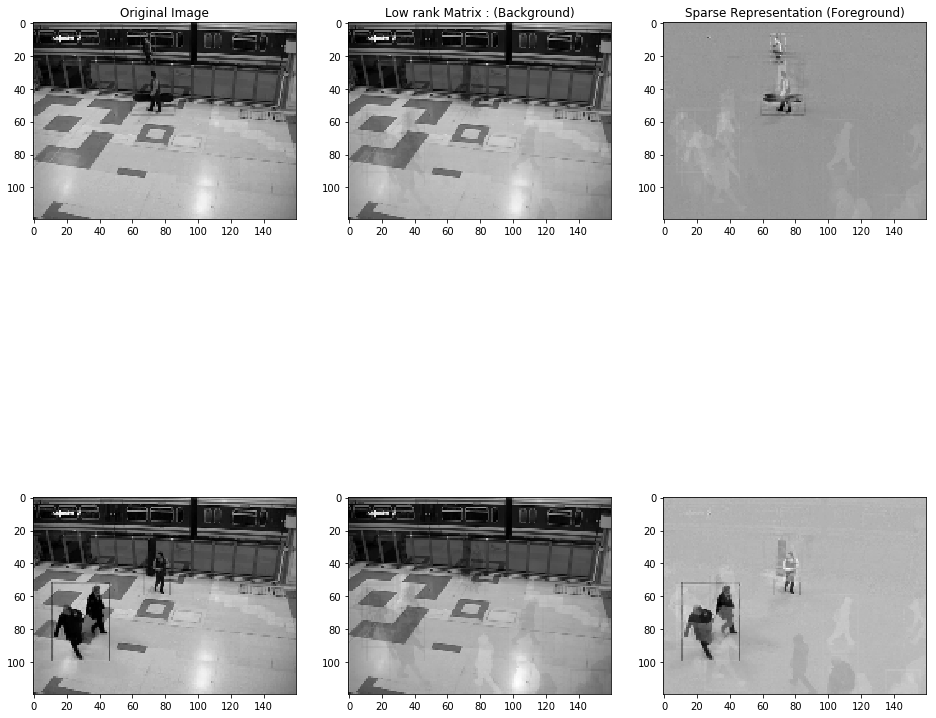

In [46]:
L,S = rpca_rrruzvd(X,sim=False,r=None)
x,y = image_shape
f, axarr = plt.subplots(2,3,figsize=(16,16))
axarr[0,0].set_title('Original Image')
axarr[0,1].set_title('Low rank Matrix : (Background)')
axarr[0,2].set_title('Sparse Representation (Foreground)')

axarr[0,0].imshow(X[:,4].reshape(x,y),cmap='gray')
axarr[0,1].imshow(L[:,4].reshape(x,y),cmap='gray')
axarr[0,2].imshow(S[:,4].reshape(x,y),cmap='gray')

axarr[1,0].imshow(X[:,10].reshape(x,y),cmap='gray')
axarr[1,1].imshow(L[:,10].reshape(x,y),cmap='gray')
axarr[1,2].imshow(S[:,10].reshape(x,y),cmap='gray')

plt.show()

In [47]:
X.shape

(19200, 16)

In [48]:
plt.imshow(X[:,0].reshape(x,y))

In [49]:
# f, axarr = plt.subplots(1,3,figsize=(15,15))
# axarr[0,0].set_title('Original Image')
# axarr[0,1].set_title('Low rank Matrix : (Background)')
# axarr[0,2].set_title('Sparse Representation (Foreground)')

# for i in range(10):

#     axarr[i,0].imshow(X[:,i].reshape(x,y),cmap='gray')
#     axarr[i,1].imshow(L[:,i].reshape(x,y),cmap='gray')
#     axarr[i,2].imshow(S[:,i].reshape(x,y),cmap='gray')

# plt.show()

## Shadow and Specularity Removal

In [50]:
file_names = (glob.glob("./face_data/*.pgm"))

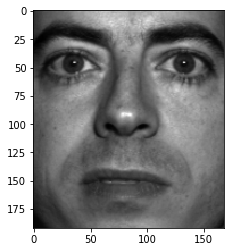

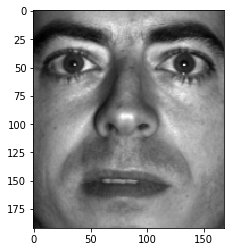

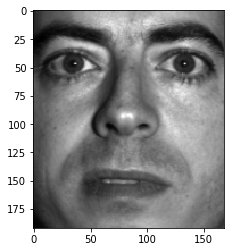

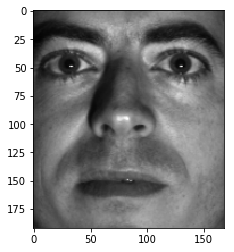

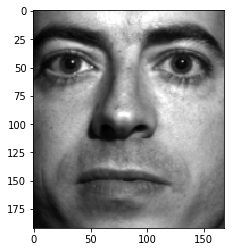

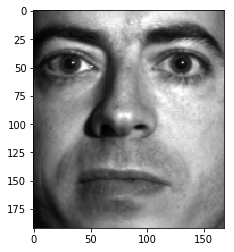

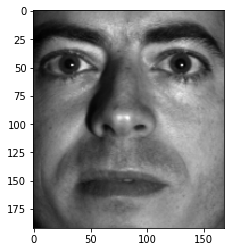

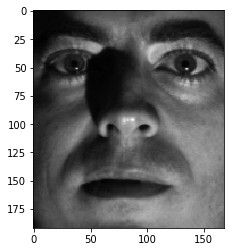

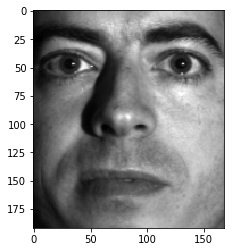

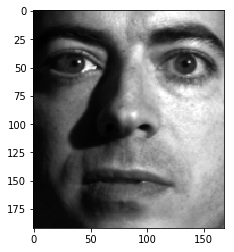

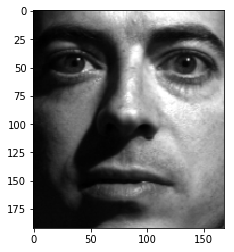

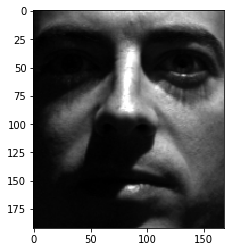

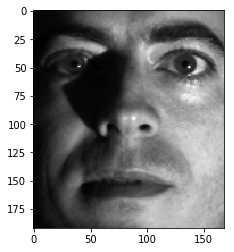

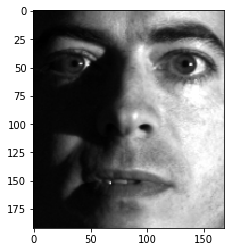

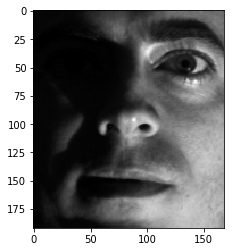

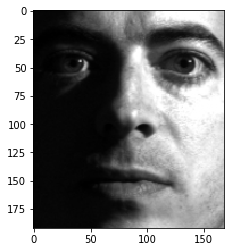

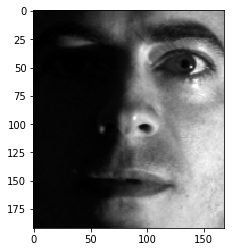

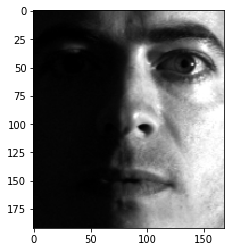

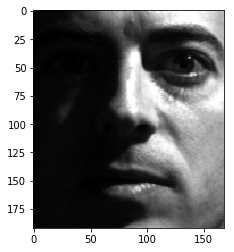

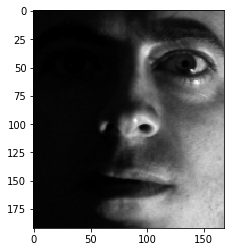

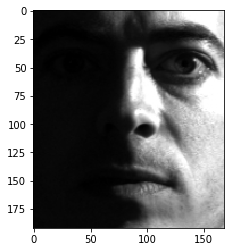

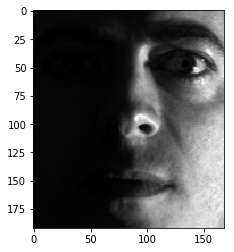

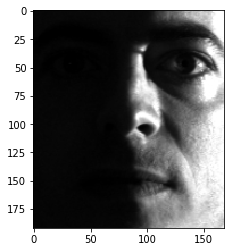

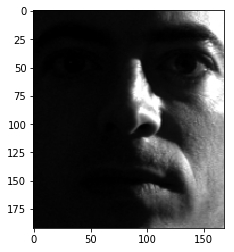

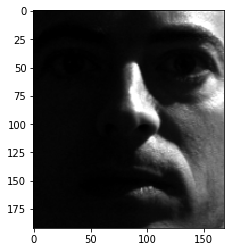

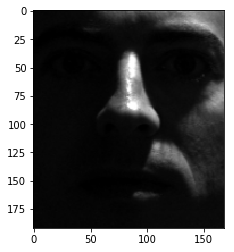

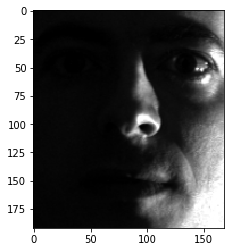

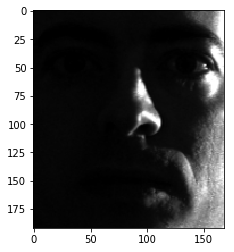

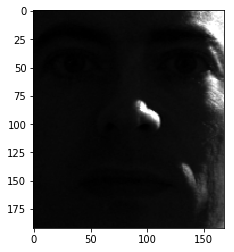

In [51]:
is1 = True
for file in file_names:
    
    frame = cv2.imread(file,0)
    face_shape = frame.shape
    frame_f = frame.flatten()
    if(is1):
        X_face = frame_f
        is1 = False
    else:
        X_face = np.column_stack((X_face,frame_f))
        if(X_face.shape[1]>200):
            break

    plt.imshow(frame,cmap='gray')
    plt.show()

In [52]:
face_shape

(192, 168)

In [53]:
X_face.shape

(32256, 29)

In [54]:
L,S = rpca_rrruzvd(X_face,sim=False,r=None)

(32256, 29)
Error: 14.628415076188261, Ratio: 0.15613620945966236, Pred_rank: 5
(32256, 29)
Error: 13.993787585492298, Ratio: 6.536869131173547e-12, Pred_rank: 5


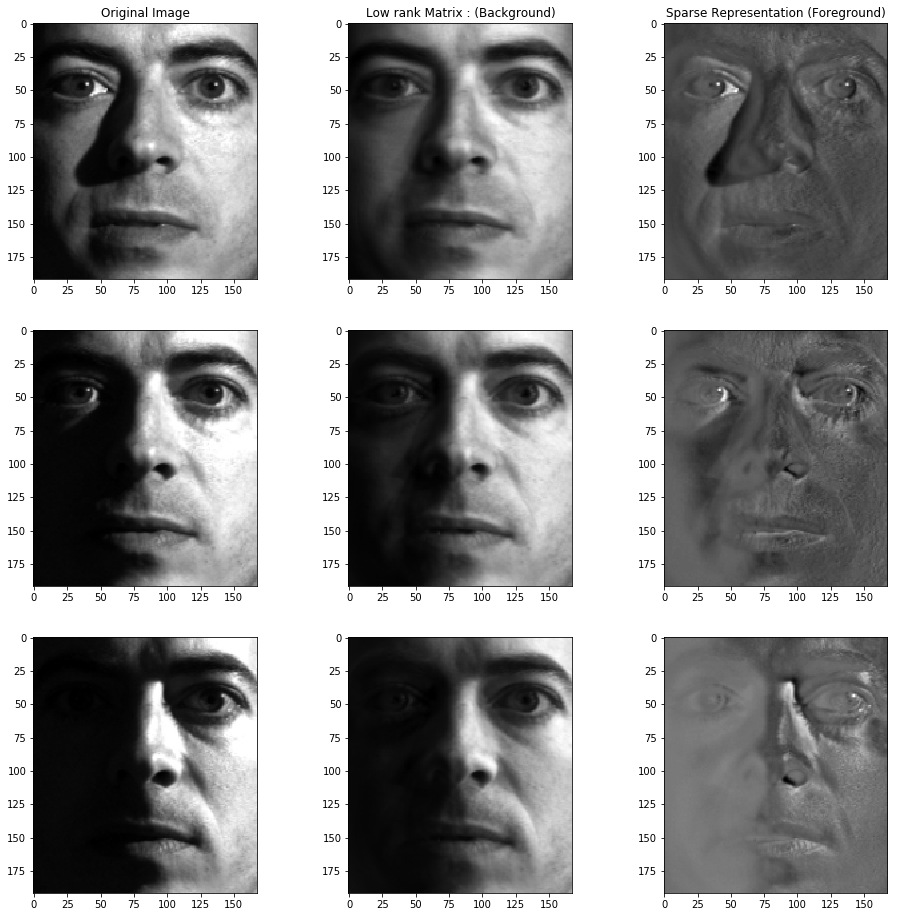

In [55]:
x,y = face_shape
f, axarr = plt.subplots(3,3,figsize=(16,16))
axarr[0,0].set_title('Original Image')
axarr[0,1].set_title('Low rank Matrix : (Background)')
axarr[0,2].set_title('Sparse Representation (Foreground)')

axarr[0,0].imshow(X_face[:,9].reshape(x,y),cmap='gray')
axarr[0,1].imshow(L[:,9].reshape(x,y),cmap='gray')
axarr[0,2].imshow(S[:,9].reshape(x,y),cmap='gray')

axarr[1,0].imshow(X_face[:,15].reshape(x,y),cmap='gray')
axarr[1,1].imshow(L[:,15].reshape(x,y),cmap='gray')
axarr[1,2].imshow(S[:,15].reshape(x,y),cmap='gray')

axarr[2,0].imshow(X_face[:,20].reshape(x,y),cmap='gray')
axarr[2,1].imshow(L[:,20].reshape(x,y),cmap='gray')
axarr[2,2].imshow(S[:,20].reshape(x,y),cmap='gray')



plt.show()